In [12]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from cycler import cycler
plt.style.use('ggplot')

# Plot Styles

In [38]:
# Adjust size of all plots displayed in jupyter
plt.rcParams['figure.figsize'] = [12, 8]

# Adjust matplotlib's style
plt.style.use('seaborn-deep')
# # axes.titlesize : 24
# # axes.labelsize : 20
# lines.linewidth : 3
# lines.markersize : 10
# xtick.labelsize : 16
# ytick.labelsize : 16

In [14]:
# Load data
sales = pd.read_csv('data/business.retailsales.csv')
sales2 = pd.read_csv('data/business.retailsales2.csv')

In [15]:
# View data from business.retails.csv
display(sales)
# There are 1774 product entries with net quatity sold, gross sales, discounts and returns

# rename the columns to exlude spaces
sales.columns = sales.columns.str.replace(' ', '_')

# rename the product type values to exclude spaces
sales['Product_Type'] = sales['Product_Type'].str.strip()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


In [16]:
# make a table with stadard deviation and standard error for total net sales

# remove nans from sales dataset
sales = sales.dropna()
sales.isnull().values.any()

# create table 
total_sales = sales.groupby('Product_Type').agg([np.mean, np.std, sp.sem])

# Round all values
total_sales = total_sales.round()

# rearange columns so that total net sales is first
cols = total_sales.columns.tolist()
cols = cols[-3:] + cols[:-3]
total_sales = total_sales[cols]

# rearange rows from highest to lowest for total net sales
total_sales = total_sales.sort_values([('Total_Net_Sales','mean')], ascending=False)

display(total_sales)

Total_Net_Sales               Net_Quantity             \
                            mean    std    sem         mean   std  sem   
Product_Type                                                             
Art & Sculpture            251.0  749.0   41.0          4.0   7.0  0.0   
Basket                     245.0  366.0   16.0          3.0   3.0  0.0   
Skin Care                  234.0  357.0  108.0          9.0  12.0  3.0   
Christmas                  198.0  313.0   37.0          8.0  13.0  1.0   
Home Decor                 196.0  275.0   24.0          3.0   3.0  0.0   
One-of-a-Kind              176.0   79.0   23.0          1.0   0.0  0.0   
Recycled Art               161.0  305.0   64.0          4.0   8.0  2.0   
Jewelry                    141.0  217.0   15.0          5.0   9.0  1.0   
Textiles                   120.0  134.0   36.0          3.0   2.0  1.0   
Furniture                  117.0   72.0   18.0          2.0   1.0  0.0   
Accessories                 97.0   81.0   13.0          2.0   4.0  1.0   
Kitchen                     95.0  136.0   11.0          5.0   8.0  1.0   
Music                       83.0   89.0   16.0          3.0   4.0  1.0   
Fair Trade Gifts            79.0   98.0   18.0          4.0   6.0  1.0   
Soapstone                   69.0   68.0    8.0          3.0   3.0  0.0   
Kids                        59.0   50.0    6.0          2.0   2.0  0.0   
Easter                      34.0    NaN    NaN          1.0   NaN  NaN   
Gift Baskets                20.0    NaN    NaN          1.0   NaN  NaN   

                 Gross_Sales               Discounts            Returns        \
                        mean    std    sem      mean   std  sem    mean   std   
Product_Type                                                                    
Art & Sculpture        268.0  866.0   47.0      -9.0  37.0  2.0    -9.0  92.0   
Basket                 261.0  392.0   17.0      -8.0  20.0  1.0    -8.0  37.0   
Skin Care              237.0  364.0  110.0      -3.0   8.0  2.0     0.0   0.0   
Christmas              212.0  323.0   38.0      -5.0   9.0  1.0    -9.0  49.0   
Home Decor             207.0  284.0   25.0      -8.0  13.0  1.0    -3.0  13.0   
One-of-a-Kind          182.0   90.0   26.0      -6.0  13.0  4.0     0.0   0.0   
Recycled Art           165.0  311.0   65.0      -4.0   7.0  1.0     0.0   0.0   
Jewelry                148.0  230.0   16.0      -5.0  10.0  1.0    -2.0  11.0   
Textiles               135.0  147.0   39.0      -8.0  12.0  3.0    -7.0  18.0   
Furniture              127.0   86.0   21.0     -11.0  18.0  4.0     0.0   0.0   
Accessories            100.0   84.0   13.0      -3.0   5.0  1.0     0.0   0.0   
Kitchen                100.0  138.0   11.0      -3.0   4.0  0.0    -2.0  11.0   
Music                   91.0   96.0   18.0      -3.0   5.0  1.0    -5.0  21.0   
Fair Trade Gifts        81.0  101.0   19.0      -2.0   4.0  1.0     0.0   0.0   
Soapstone               72.0   69.0    8.0      -1.0   3.0  0.0    -1.0   6.0   
Kids                    61.0   51.0    6.0      -2.0   3.0  0.0     0.0   0.0   
Easter                  38.0    NaN    NaN      -4.0   NaN  NaN     0.0   NaN   
Gift Baskets            20.0    NaN    NaN       0.0   NaN  NaN     0.0   NaN   

                       
                  sem  
Product_Type           
Art & Sculpture   5.0  
Basket            2.0  
Skin Care         0.0  
Christmas         6.0  
Home Decor        1.0  
One-of-a-Kind     0.0  
Recycled Art      0.0  
Jewelry           1.0  
Textiles          5.0  
Furniture         0.0  
Accessories       0.0  
Kitchen           1.0  
Music             4.0  
Fair Trade Gifts  0.0  
Soapstone         1.0  
Kids              0.0  
Easter            NaN  
Gift Baskets      NaN

In [40]:
# get only the mean columns 
df = total_sales.iloc[:, total_sales.columns.get_level_values(1)=='mean']

# collapse hierachical dataframe
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# make product type into a data column instead of an index
# df.reset_index(inplace=True)

# make all values in table positive
df[['Discounts_mean', 'Returns_mean']] = df[['Discounts_mean', 'Returns_mean']].abs()

In [18]:
# Remove Net quantity and gross sales
df.drop(df.columns[[1,2]], axis = 1, inplace=True)

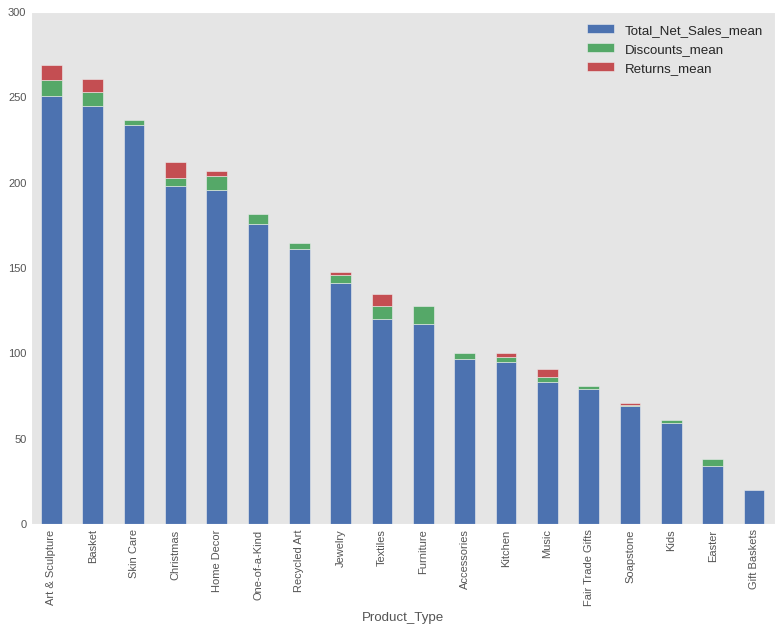

In [39]:
# Stacked bar chart
df.plot(kind='bar', stacked=True)
plt.grid(False)
plt.show()

In [ ]:
# get only the mean and standard error columns for total net sales


In [51]:
# View data from business.retails2.csv
print(sales2)
# There are 35 datapoints showing orders, gross sales, net sales, discounts and returns from Janury 2017 through to december 2019

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


# Projections for Q4 of 2020 (oct-dec)

## List of sales per item for Q4